Markowitz efficient frontier states investors should consider multiple securities in a portfolio rather than individually. A portfolio that contains combination of securities with low correlation can benefit from a diversification effect. Meaning investors can optimize their return without assuming additional risk. Markowitz 

In [133]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

WE will download the data on PG stock and ^GSPC

In [135]:
tickers = ["PG","^GSPC"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source = "yahoo", start = "2012-1-1", end = "2018-12-31")["Adj Close"]

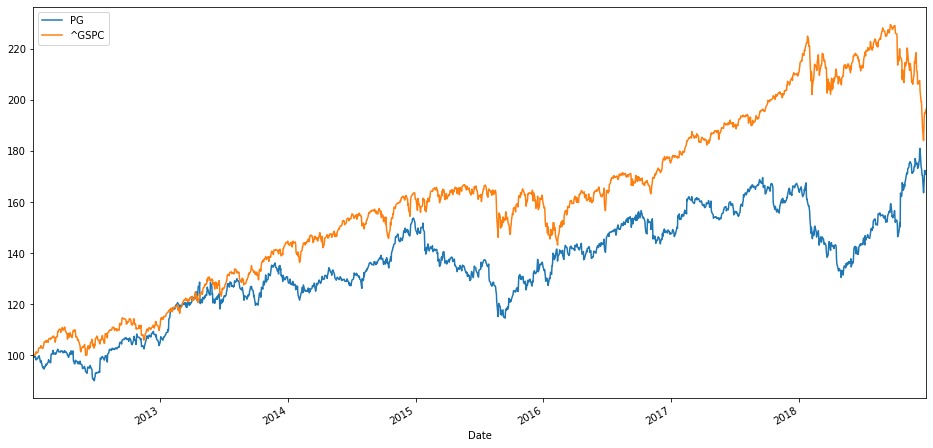

In [136]:
#normalize the data
(data/data.iloc[0]*100).plot(figsize = (16,8))
plt.show()

Calculate the daily change, returns of both securties

In [137]:
simple_returns = (data/data.shift(1)) - 1

In [138]:
#we will check if the data matches and have equal values - > 2494 PG and 2494 ^GSPC
simple_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2012-01-03 to 2018-12-31
Data columns (total 2 columns):
PG       1759 non-null float64
^GSPC    1759 non-null float64
dtypes: float64(2)
memory usage: 41.2 KB


In [139]:
#check the tail end of the data to check for most current date
simple_returns.tail()

,PG,^GSPC
Date,,
2018-12-24,-0.039683,-0.027112
2018-12-26,0.031250,0.049594
2018-12-27,0.021423,0.008563
2018-12-28,-0.009128,-0.001242
2018-12-31,0.008116,0.008492


In [140]:
simple_returns.cov() * 250

,PG,^GSPC
PG,0.021513,0.009302
^GSPC,0.009302,0.016424


In [141]:
#the correlation between PF and ^GSPC is positive but low so the portfolio should benefit from 
#markowitz diversification effect
simple_returns.corr()

,PG,^GSPC
PG,1.000000,0.494857
^GSPC,0.494857,1.000000


In [142]:
# portfolio optimization -> We will need the count of securities in the portfolio
port_asset = len(tickers)
print(f"The number of securties in the portfolio is {port_asset}")

The number of securties in the portfolio is 2


WE will need the expected returns and the volatility to simulate a mean variance combination with 1000 simulations. WE are considering 1000 combinations of the same 2 assets of their weight values not 1000 different investments.

In [150]:
#Bellow we will run a simulation of 1000 differenct portfolio that contain PG and ^GSPC to test Markowitz theory.
#This Will provide us with both 1000 different expected returns and 1000 volatility values

portfolio_returns = []
portfolio_volatilities = []
weights1 = []
weights2 = []

for x in range(1000):
    weights = np.random.random(port_asset)
    weights[0] = weights[0]/np.sum(weights)
    weights[1] = weights[1]/np.sum(weights)
    weights /= np.sum(weights)
    weights1.append(weights[0])
    weights2.append(weights[1])
    portfolio_returns.append(np.sum(weights * simple_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(simple_returns.cov() * 250, weights))))
    
    # we will need to convert the volatilities and and the ezpected returns into a numpy array 
port_Returns = np.array(portfolio_returns)
port_Vol = np.array(portfolio_volatilities)

In [151]:
df2 = pd.DataFrame(port_Returns, columns=["Returns"])
df2["Risk"] = port_Vol
df2["Weight  PG"] = weights1
df2["Weight ^GSPC"] = weights2

In [153]:
df2.tail()

,Returns,Risk,Weight PG,Weight ^GSPC
995,0.088559,0.143857,0.965568,0.034432
996,0.089729,0.138268,0.892859,0.107141
997,0.098187,0.117474,0.367337,0.632663
998,0.096117,0.118806,0.495963,0.504037
999,0.090123,0.136507,0.868426,0.131574


In [144]:
portfolios = pd.DataFrame({"Volatility": port_Vol, "Returns": port_Returns})

In [145]:
portfolios.head()

,Volatility,Returns
0,0.127559,0.092416
1,0.119122,0.095885
2,0.130001,0.091726
3,0.128944,0.092017
4,0.119663,0.095533


In [146]:
portfolios.tail()

,Volatility,Returns
995,0.131477,0.091336
996,0.127562,0.103925
997,0.119516,0.095624
998,0.121293,0.094675
999,0.123540,0.093744


In [147]:
portfolios["Volatility"].min()

0.11747433615591853

In [148]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Volatility    1000 non-null float64
Returns       1000 non-null float64
dtypes: float64(2)
memory usage: 15.8 KB


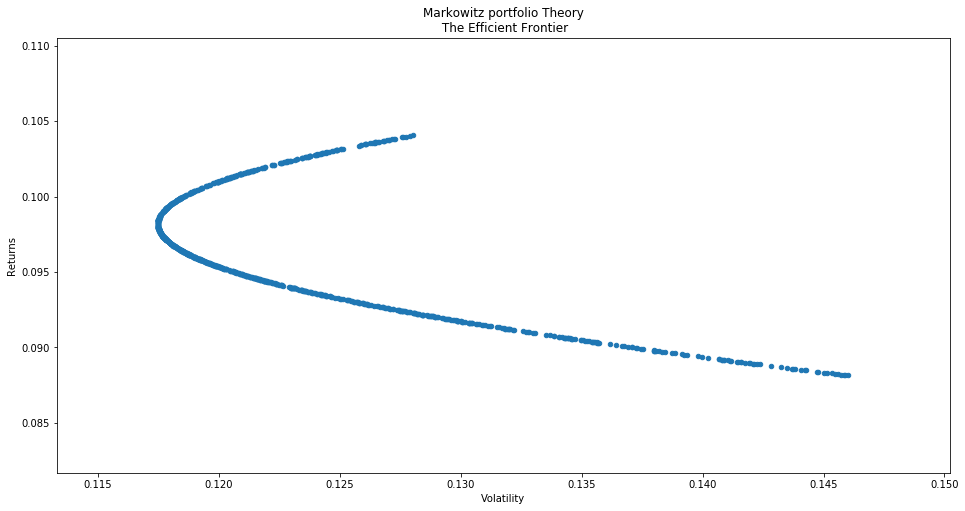

In [149]:
portfolios.plot(x ="Volatility", y ="Returns", kind = "scatter", figsize = (16,8))
plt.title("Markowitz portfolio Theory\n The Efficient Frontier")
plt.show()

THe above graph shows a set of 1000 portfolios of different weights containing PG & ^GSPC,  and displays the typical shape of Markowitz efficient portfolio. There are a set of efficient portfoilios that can provide a higher rate of return for the same or lower risk. The starting point is the minimum variance portfolio. 